# Pruebas de exportar casillas con OpenCV

OpenCV utiliza imagenes como base, pero tengo pdf's.
Primero tendré que convertir cada página en un png.

## Extraer imagenes

Probando que lo exporta de forma correcta (algunas herramientas dan conflictos con las casillas)

In [1]:
from pdf2image import convert_from_path

file_name = 'question_11111.pdf'

In [2]:
with open(file_name, 'r') as file:
    print(file)

<_io.TextIOWrapper name='question_11111.pdf' mode='r' encoding='UTF-8'>


In [3]:
pages = convert_from_path(file_name, 200)

for page in pages:
    page.save('png/question_11111.png', 'PNG')

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

Genera los png sin quitar las casillas: OK

In [4]:
import checkboxes
import cv2
import matplotlib.pyplot as plt
import numpy as np

Detectar las casillas con openCV, como en el articulo:
https://towardsdatascience.com/checkbox-table-cell-detection-using-opencv-python-332c57d25171

probando directamente el codigo

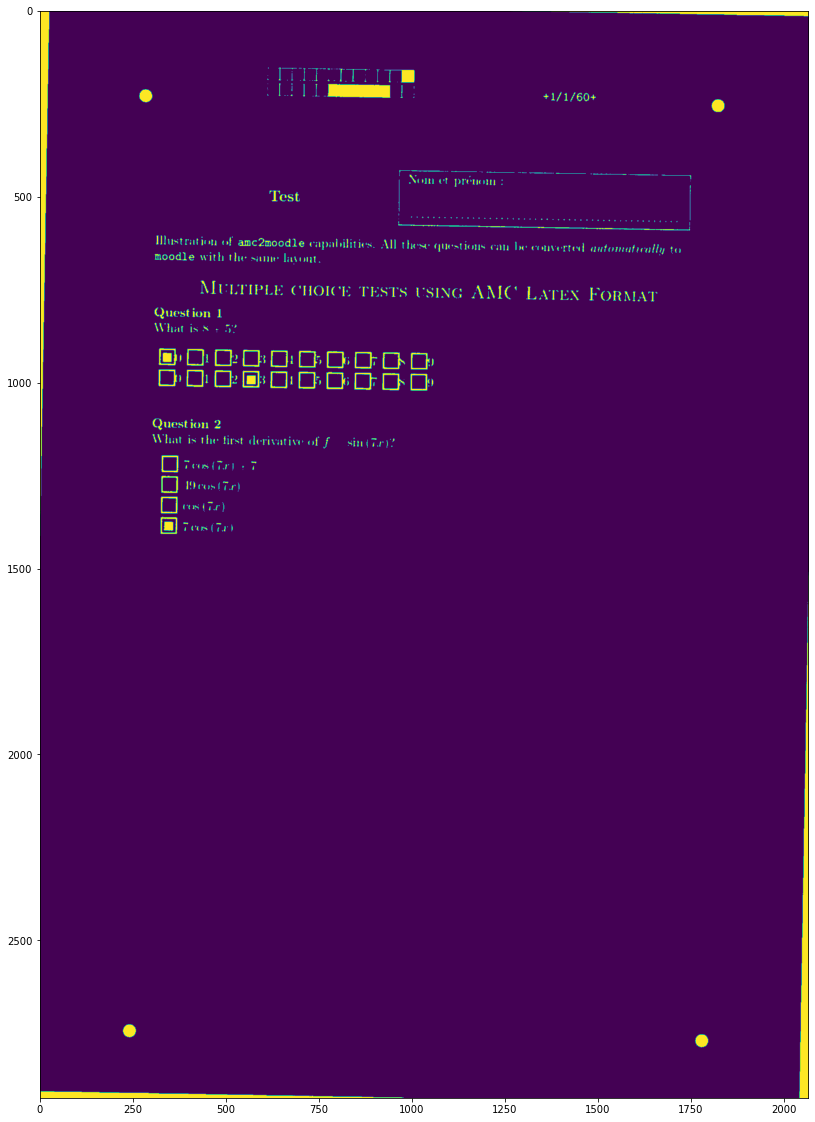

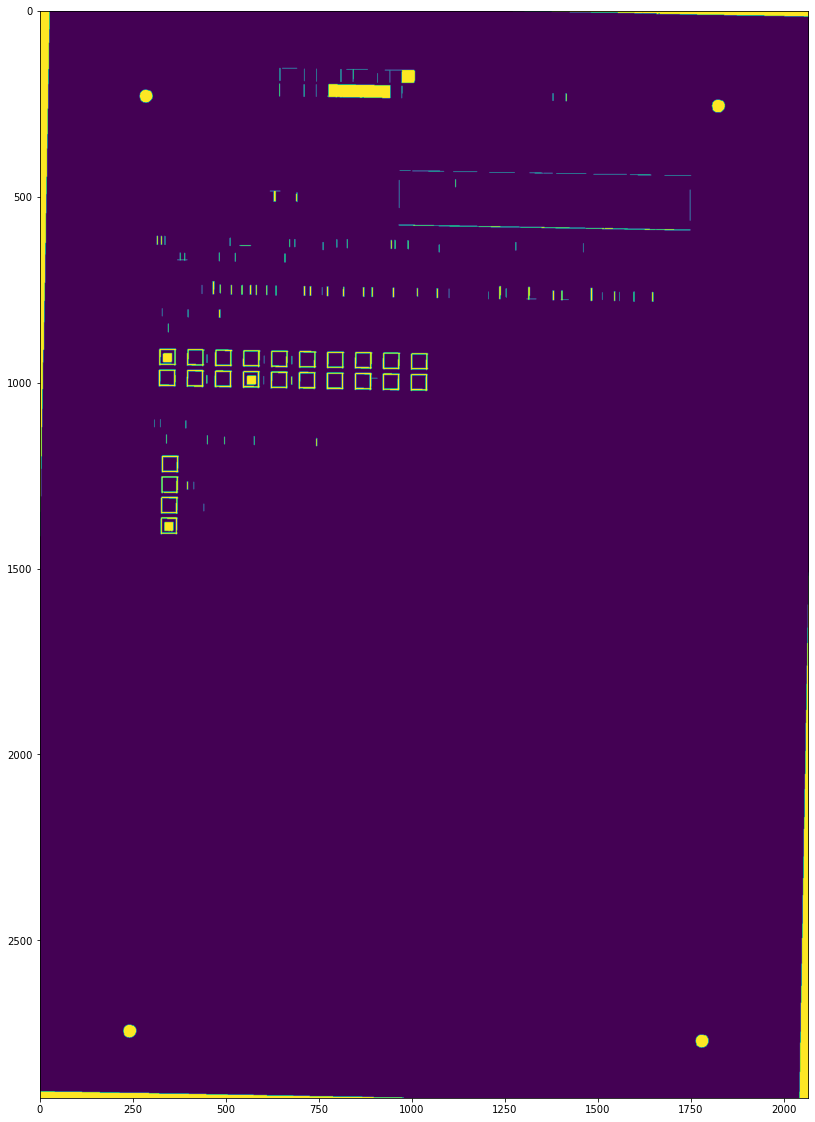

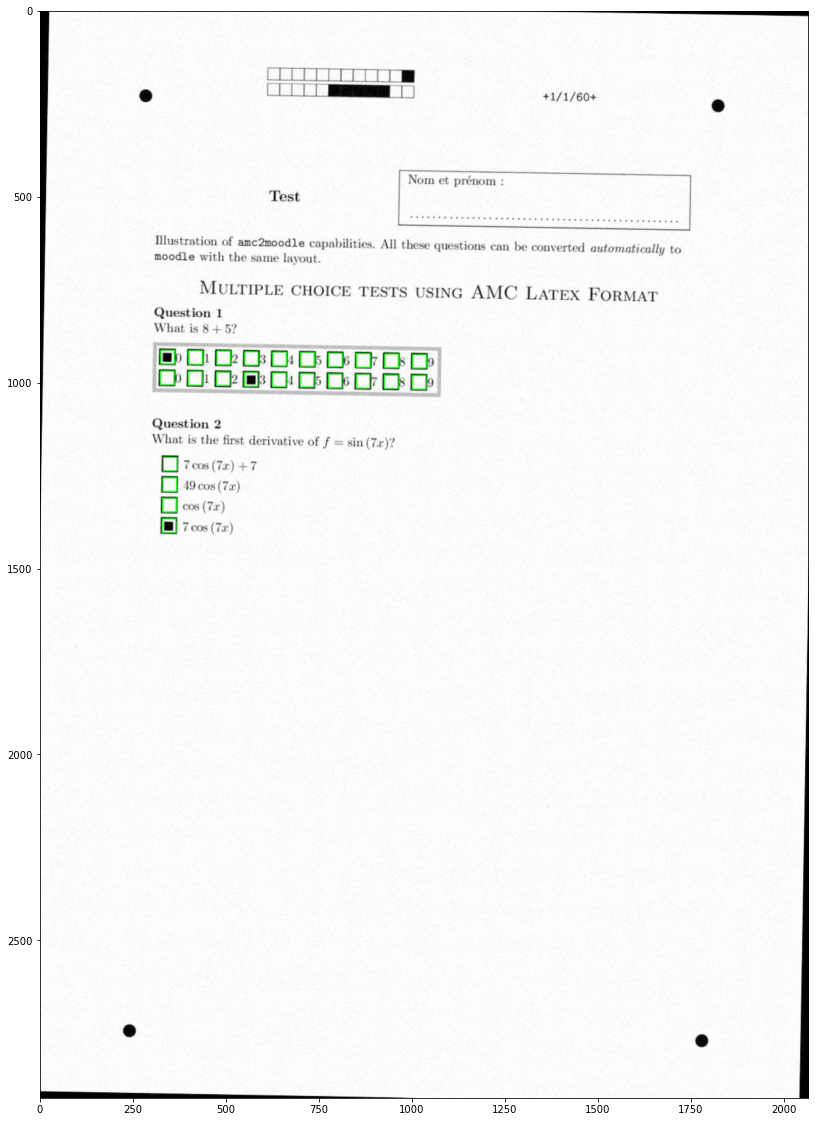

In [5]:
#for i in range(9):
inner_boxes = []
stats = []
for i in range(1):
    i = 0
    file = 'pngs/page_' + str(i) + '.png' # 'out.png'
    img = cv2.imread(file)
    gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    th1,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
    img_bin=~img_bin
    plt.figure(figsize=(20,20))
    plt.imshow(img_bin)

    ### selecting min size as 15 pixels
    line_min_width = 20
    kernal_h = np.ones((1,line_min_width), np.uint8)
    kernal_v = np.ones((line_min_width,1), np.uint8)

    # find horizontal lines
    img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img_bin_h)
    # find vertical lines
    img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img_bin_v)
    # join horizontal and vertical lines
    img_bin_final = img_bin_h | img_bin_v
    plt.figure(figsize=(20,20))
    plt.imshow(img_bin_final)

    _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

    for x,y,w,h,area in stats[2:]:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    plt.figure(figsize=(20,20))
    plt.imshow(img)
    #print('x, y, w, h, a')
    #print(stats)
    for x,y,w,h,_ in stats[2:]:
        x2,y2 = x+w,y+h
        inner_boxes.append(img_bin[y:y2].transpose()[x:x2])

llamando a la funcion creada en chackboxes.py

In [6]:
for i in range(9):
    boxes = checkboxes.find_checkboxes(file='pngs/page_' + str(i) + '.png')

14 feb: extraido los interiores de los cuadrados

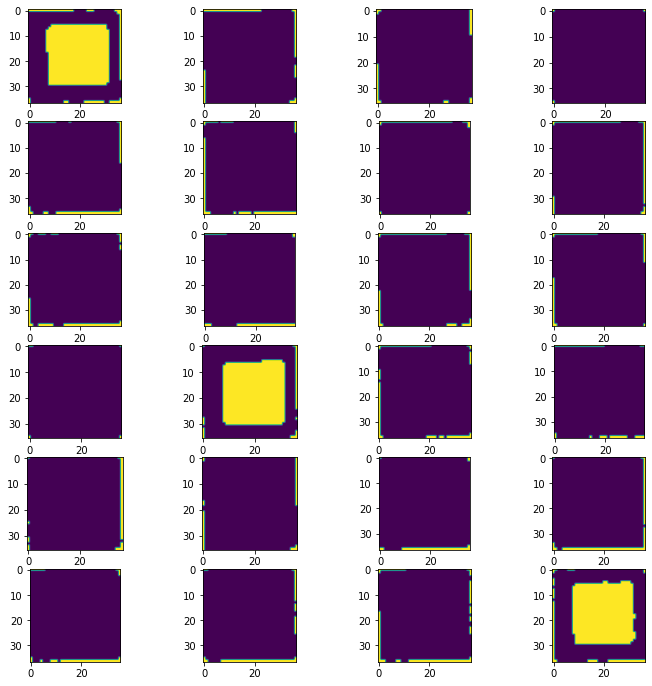

In [7]:
fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 6
for i, box in enumerate(inner_boxes):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(box)
plt.show()

# pruebas con el examen escaneado

In [8]:
#for i in range(9):
inner_boxes = []
stats = []
for i in range(1):
    i = 0
    file = '/home/andres/Downloads/test casillas marcadas/scanned/img_temp_0.jpg' # 'pngs/page_' + str(i) + '.png' # 'out.png'
    img = cv2.imread(file)
    gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    th1,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
    img_bin=~img_bin
    plt.figure(figsize=(20,20))
    plt.imshow(img_bin)

    ### selecting min size as 15 pixels
    line_min_width = 35
    kernal_h = np.ones((1,line_min_width), np.uint8)
    kernal_v = np.ones((line_min_width,1), np.uint8)

    # find horizontal lines
    img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img_bin_h)
    # find vertical lines
    img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img_bin_v)
    # join horizontal and vertical lines
    img_bin_final = img_bin_h | img_bin_v
    plt.figure(figsize=(20,20))
    plt.imshow(img_bin_final)

    _, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

    for x,y,w,h,area in stats[2:]:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    plt.figure(figsize=(20,20))
    plt.imshow(img)
    #print('x, y, w, h, a')
    #print(stats)
    for x,y,w,h,_ in stats[2:]:
        x2,y2 = x+w,y+h
        inner_boxes.append(img_bin[y:y2].transpose()[x:x2])

[ WARN:0@4.301] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/andres/Downloads/test casillas marcadas/scanned/img_temp_0.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


parametrizado la funcion para poder cambiar los dpi y si imprime los graficos

In [ ]:
def prueba(dpi=250, print = False):
    file = '/home/andres/Downloads/test casillas marcadas/scanned/scanned_22222.pdf'        # home/andres/Downloads/test casillas marcadas/filled/question_11111.pdf
    img_file='img_temp.png'
    pages = convert_from_path(file, dpi)
    inner_boxes2 = []
    stats2 = []
    QRs = []
    for page in pages:
        page.save(img_file)
        img = cv2.imread(img_file)
        if print:
            plt.figure(figsize=(20,20))
            plt.imshow(img)
        gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # th1,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
        blur = cv2.GaussianBlur(gray_scale,(5,5),0)
        th1,img_bin = cv2.threshold(blur,0,225,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img_bin=~img_bin
        if print:
            plt.figure(figsize=(20,20))
            plt.imshow(img_bin)

        ### selecting min size: (for 250 dpi)
        #   from 35: no longer recognizes most of the AMC boxes in the header
        #   from 40: no longer recognizes the QR inner boxes
        #   from 45: no longer finds the checkboxes
        line_min_width = int(dpi * 0.14)
        kernal_h = np.ones((1,line_min_width), np.uint8)
        kernal_v = np.ones((line_min_width,1), np.uint8)

        # find horizontal lines
        img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
        #plt.figure(figsize=(20,20))
        #plt.imshow(img_bin_h)
        # find vertical lines
        img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)
        #plt.figure(figsize=(20,20))
        #plt.imshow(img_bin_v)
        # join horizontal and vertical lines
        img_bin_final = img_bin_h | img_bin_v
        if print:
            plt.figure(figsize=(20,20))
            plt.imshow(img_bin_final)

        _, labels, stats_tmp,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

        # QR
        qr_detect = cv2.QRCodeDetector()
        value, coordinates, qr = qr_detect.detectAndDecode(img)
        # exam, variant, page = value.split(sep=',')
        QRs.append({'value': value, 'coordinates': coordinates})

        if print:
            for x,y,w,h,area in stats_tmp:      # [2:]
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

            plt.figure(figsize=(20,20))
            plt.imshow(img)
        #print('x, y, w, h, a')
        #print(stats)
        stats2.append(stats_tmp[2:])
        for x,y,w,h,_ in stats_tmp[2:]:
            x2,y2 = x+w,y+h
            inner_boxes2.append(img_bin[y:y2].transpose()[x:x2])
    return [inner_boxes2, stats2, QRs]

In [ ]:
prueba(dpi=300 ,print=True)

In [ ]:
inner_boxes_250, stats_250, QRs_250 = prueba()

In [ ]:
stats_250

In [ ]:
QRs_250

In [ ]:
QRs_250[0]['coordinates'][0]

pruebas con distintos dpi:
con 50 y 100 dpi da error
150 dpi: ~ 1750 alto x 1250 ancho
200 dpi: ~ 2300 alto x 1650 ancho
250 dpi: ~ 2900 alto x 2100 ancho
para parametrizar la altura/ancho respecto al dpi: ~ 11.6 * dpi alto x 8.3 * dpi ancho

In [ ]:
inner_boxes_200, stats_200, QRs_200 = prueba(dpi=200,print=True)

In [ ]:
stats_200

In [ ]:
ib_last, stats_last, QRs_last = prueba(dpi=600,print=True)

In [ ]:
QRs_last

In [ ]:
def prueba_qrs(dpi=250):
    file = '/home/andres/Downloads/test casillas marcadas/scanned/scanned_11111.pdf'
    img_file='img_temp.png'
    pages = convert_from_path(file, dpi)
    QRs = []
    for page in pages:
        page.save(img_file)
        img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        # blur = cv2.GaussianBlur(img,(5,5),0)
        # th1,img_th= cv2.threshold(img,0,225,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        qr_detect = cv2.QRCodeDetector()
        value, coordinates, qr = qr_detect.detectAndDecode(img_th)
        print(value, coordinates, qr)

In [ ]:
prueba_qrs(100)

The contours have this data array([[[   0,    0]],

       [[   0, 2923]],

       [[2066, 2923]],

       [[2066,    0]]], dtype=int32)
The contours have this data array([[[1630, 2745]],

       [[1630, 2771]],

       [[1655, 2771]],

       [[1655, 2745]]], dtype=int32)
The contours have this data array([[[1725, 2650]],

       [[1725, 2676]],

       [[1751, 2676]],

       [[1751, 2650]]], dtype=int32)
The contours have this data array([[[1630, 2650]],

       [[1630, 2676]],

       [[1655, 2676]],

       [[1655, 2650]]], dtype=int32)
The contours have this data array([[[ 327, 2625]],

       [[ 327, 2661]],

       [[ 363, 2661]],

       [[ 363, 2625]]], dtype=int32)
The contours have this data array([[[ 327, 2570]],

       [[ 327, 2606]],

       [[ 363, 2606]],

       [[ 363, 2570]]], dtype=int32)
The contours have this data array([[[ 327, 2422]],

       [[ 327, 2459]],

       [[ 363, 2459]],

       [[ 363, 2422]]], dtype=int32)
The contours have this data array([[[ 327

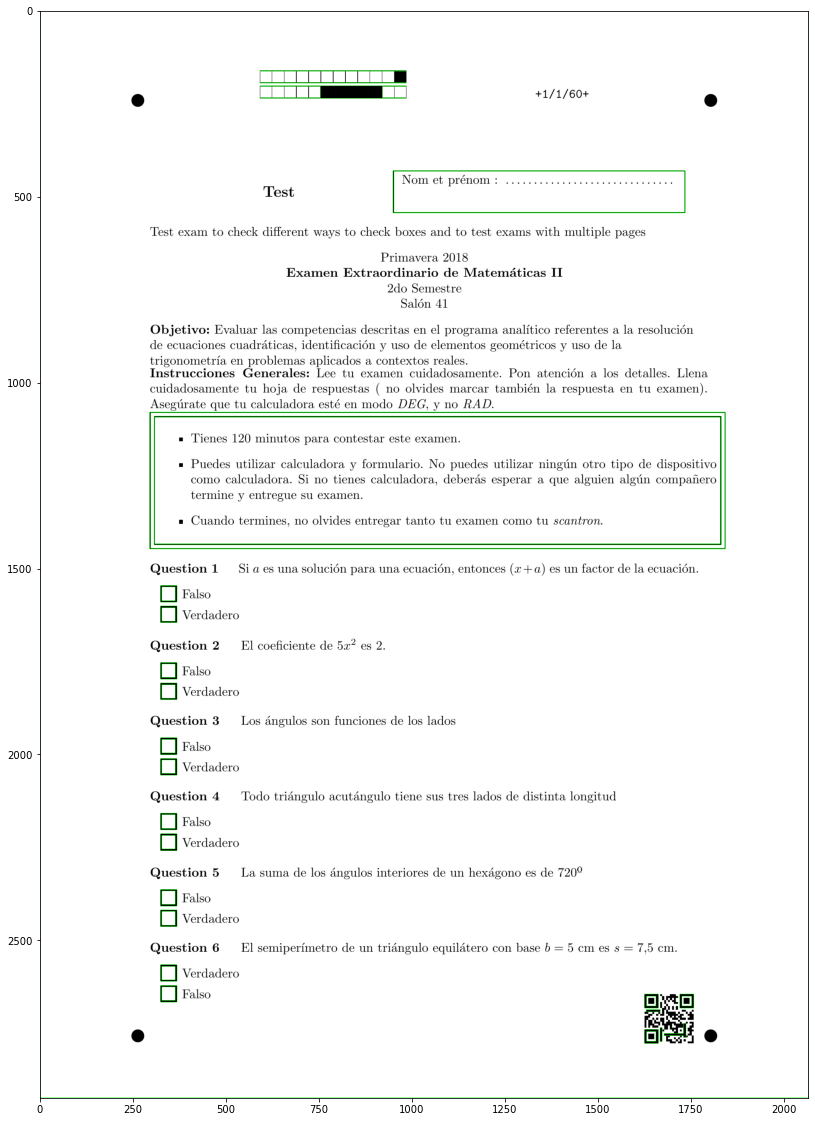

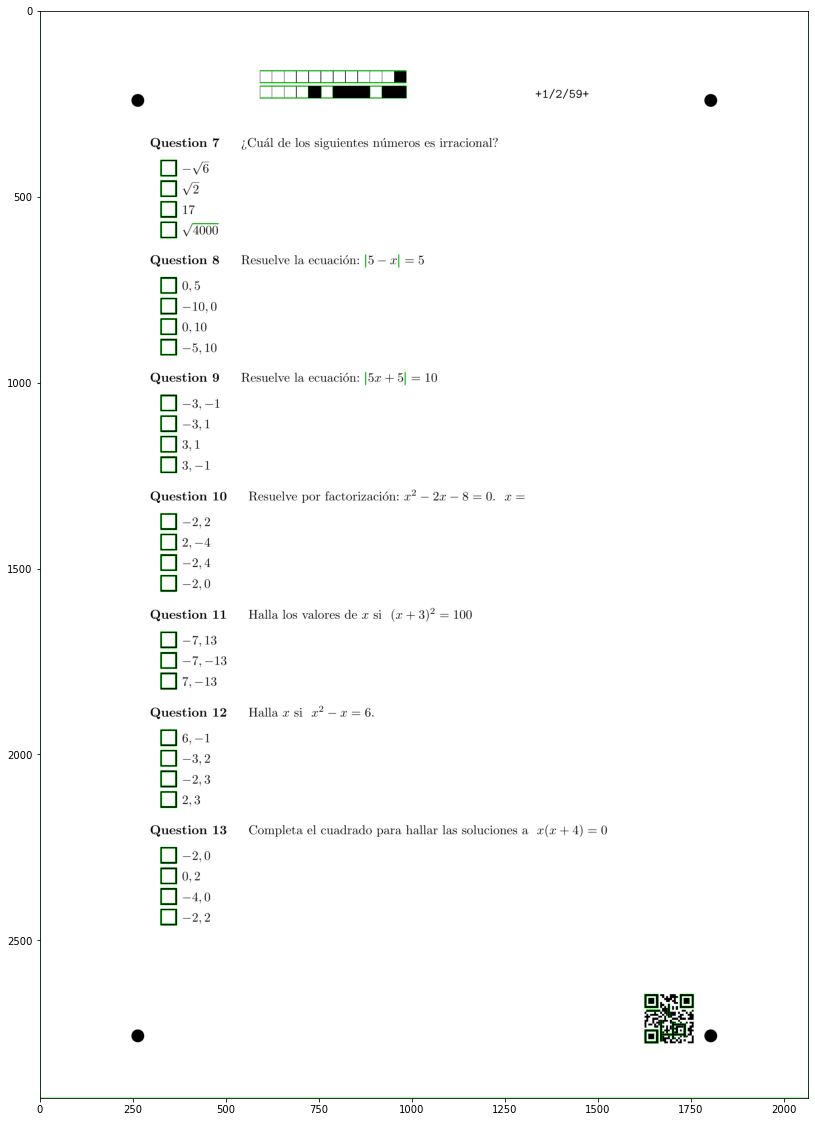

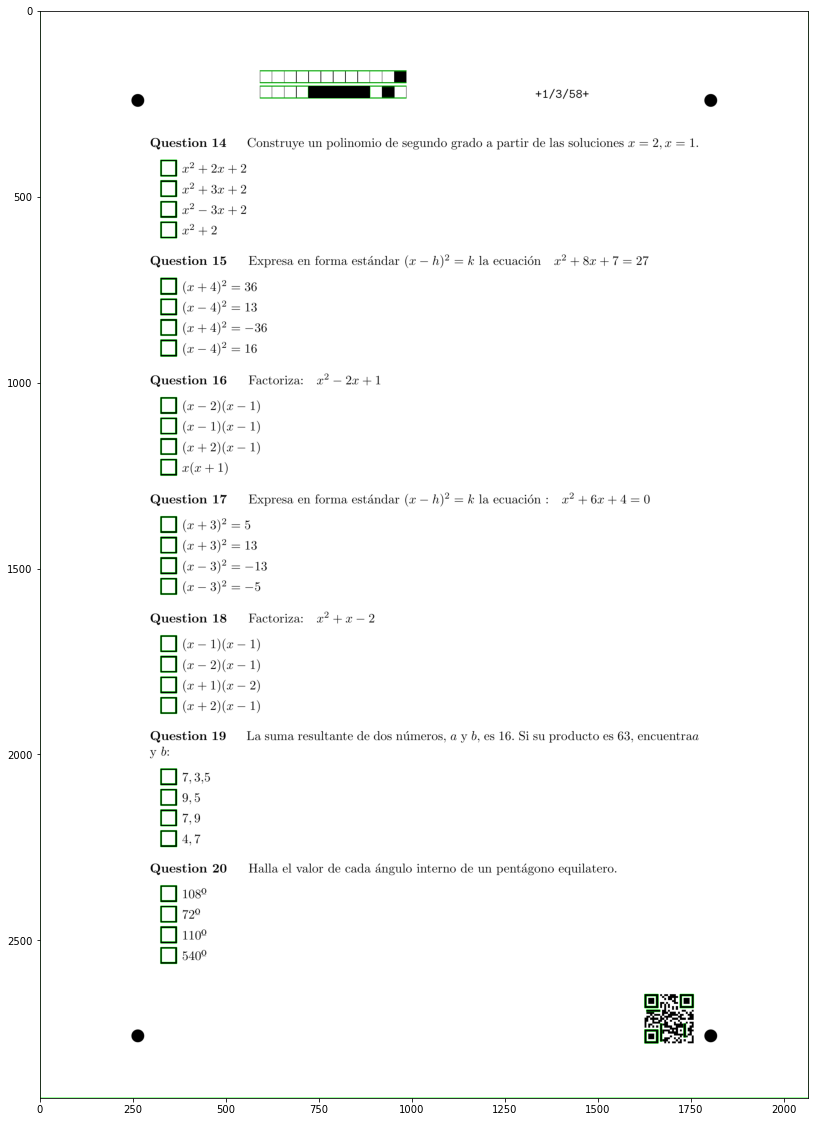

In [9]:
dpi = 250
file = '/home/andres/Downloads/test casillas marcadas/scanned/scanned_11111.pdf'        # home/andres/Downloads/test casillas marcadas/filled/question_11111.pdf
img_file='img_temp.png'
pages = convert_from_path(file, dpi)
inner_boxes2 = []
stats2 = []
QRs = []
contornos = []
kks = []
for page in pages:
    page.save(img_file)
    img = cv2.imread(img_file)
    gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # th1,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
    blur = cv2.GaussianBlur(gray_scale,(5,5),0)
    sharpen = cv2.filter2D(blur,-1,np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]]))
    th1,img_bin = cv2.threshold(sharpen,0,225,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_bin=~img_bin

    ### selecting min size: (for 250 dpi)
    #   from 35: no longer recognizes most of the AMC boxes in the header
    #   from 40: no longer recognizes the QR inner boxes
    #   from 45: no longer finds the checkboxes
    line_min_width = int(dpi * 0.14)
    kernal_h = np.ones((1,line_min_width), np.uint8)
    kernal_v = np.ones((line_min_width,1), np.uint8)

    # find horizontal lines
    img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img_bin_h)
    # find vertical lines
    img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img_bin_v)
    # join horizontal and vertical lines
    img_bin_final = img_bin_h | img_bin_v

    _, labels, stats_tmp,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

    cnts, hierarchy = cv2.findContours(~img_bin_final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    kks.append(cnts)
    for kk in cnts:
        if len(kk) == 4:
            print("The contours have this data %r" %kk)
            contornos.append(cnts)
    cv2.drawContours(img,cnts,-1,(0,255,0),1)
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    # QR
    qr_detect = cv2.QRCodeDetector()
    value, coordinates, qr = qr_detect.detectAndDecode(img)
    # exam, variant, page = value.split(sep=',')
    QRs.append({'value': value, 'coordinates': coordinates})

    #print('x, y, w, h, a')
    #print(stats)
    stats2.append(stats_tmp[2:])
    for x,y,w,h,_ in stats_tmp[2:]:
        x2,y2 = x+w,y+h
        inner_boxes2.append(img_bin[y:y2].transpose()[x:x2])

In [10]:
contornos.__len__()

83

In [ ]:
contornos

In [ ]:
kks[0][0]

In [ ]:
kks[0][0][2][0]